In [1]:
#Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt 

c:\users\ds8\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [81]:
#Importing the files
train=pd.read_csv('train_careem.csv')
test=pd.read_csv('test_careem.csv')
train_trip=pd.read_csv('trip_rating.csv')

In [3]:
train.head()

,Unnamed: 0,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated
0,0,52400320,1838640,2017-09-08 11:32:05.000,1,1,0.0,7.28666,7.17712,0,11,18,2,0.0,17.375184,0,4,1
1,1,29858456,1793472,2017-09-08 12:42:33.000,1,1,0.0,1.25836,1.05664,0,4,1,1,0.0,8.507064,0,4,1
2,2,30828968,1726788,2017-09-08 12:46:42.000,2,1,0.0,14.57820,14.44060,0,16,3,2,0.0,19.745205,0,5,1
3,3,47974768,1181696,2017-09-08 13:52:35.000,2,1,0.0,1.51911,1.18684,0,8,0,5,0.0,10.968003,0,0,0
4,4,59503764,2063752,2017-09-08 14:18:47.000,2,1,0.0,11.09320,10.67240,0,19,1,4,0.0,17.595398,0,5,1


In [4]:
test.head()

,Unnamed: 0,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled
0,0,60956364,1761208,2017-09-08 15:11:09.000,1,1,0.0,14.58090,13.63340,0,35,0,14,0.0,20.581726,0
1,1,60777268,1863028,2017-09-08 15:17:00.000,2,1,0.0,3.11665,2.78458,0,9,1,3,0.0,10.968003,0
2,2,55197228,1362580,2017-09-08 20:54:56.000,1,1,0.0,8.15772,7.48073,0,16,0,5,0.0,15.186146,0
3,3,53877020,1917600,2017-09-09 07:15:20.000,2,1,0.0,9.10110,8.39143,0,29,2,14,0.0,17.724573,0
4,4,12747160,2063780,2017-09-09 10:38:21.000,2,1,0.0,16.02280,15.32200,0,57,1,34,0.0,23.929555,0


In [5]:
train_trip.head()

,Unnamed: 0,driver_id,customer_id,rating
0,0,1410368,24305512,5
1,8,1675128,50837872,5
2,25,1775868,58055388,3
3,28,986496,8850476,5
4,55,1892204,8850476,5


In [82]:
train=train.drop(['Unnamed: 0'], axis=1)
test=test.drop(['Unnamed: 0'], axis=1)
train_trip=train_trip.drop(['Unnamed: 0'], axis=1)

In [9]:
train.shape, test.shape, train_trip.shape, len(train['customer_id'].unique()),len(test['customer_id'].unique()),len(train_trip['customer_id'].unique())

((51083, 17), (17201, 15), (47936, 3), 9000, 3000, 6269)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51083 entries, 0 to 51082
Data columns (total 17 columns):
customer_id                        51083 non-null int64
driver_id                          51083 non-null int64
creation_date                      51083 non-null object
booking_source                     51083 non-null int64
car_type                           51083 non-null int64
estimated_distance                 51083 non-null float64
distance_travelled                 51083 non-null float64
distance_travelled_while_moving    51083 non-null float64
estimated_duration                 51083 non-null int64
duration_time                      51083 non-null int64
wait_time_initial                  51083 non-null int64
wait_time_in_journey               51083 non-null int64
estimated_price                    51083 non-null float64
price                              51083 non-null float64
is_cancelled                       51083 non-null int64
rating                             51083

In [16]:
len(set(train['customer_id'].unique()).intersection(set(train_trip['customer_id'].unique())))
#len(set(train['customer_id'].unique())-(set(train_trip['customer_id'].unique())))

4667

In [17]:
train.isnull().sum()

customer_id                        0
driver_id                          0
creation_date                      0
booking_source                     0
car_type                           0
estimated_distance                 0
distance_travelled                 0
distance_travelled_while_moving    0
estimated_duration                 0
duration_time                      0
wait_time_initial                  0
wait_time_in_journey               0
estimated_price                    0
price                              0
is_cancelled                       0
rating                             0
was_rated                          0
dtype: int64

In [18]:
subset=['estimated_distance','distance_travelled','distance_travelled_while_moving']
wr= round(train[train['was_rated']==1][subset].describe(),2)
wnr= round(train[train['was_rated']==0][subset].describe(),2)
pd.concat([wr, wnr], axis=1, keys=['Was rated Statistics', 'Was not rated Statistics'])

Was rated Statistics                                                     \
        estimated_distance distance_travelled distance_travelled_while_moving   
count             34877.00           34877.00                        34877.00   
mean                  0.96               6.90                            6.36   
std                   4.53               6.38                            6.21   
min                   0.00               0.00                            0.00   
25%                   0.00               3.40                            3.00   
50%                   0.00               5.45                            4.94   
75%                   0.00               8.54                            7.89   
max                 347.56             325.50                          324.57   

      Was not rated Statistics                     \
            estimated_distance distance_travelled   
count                 16206.00           16206.00   
mean                      0.82               6.62   
std                       4.13               7.25   
min                       0.00               0.00   
25%                       0.00               2.61   
50%                       0.00               5.13   
75%                       0.00               8.63   
max                     179.79             151.04   

                                       
      distance_travelled_while_moving  
count                        16206.00  
mean                             6.14  
std                              7.06  
min                              0.00  
25%                              2.26  
50%                              4.61  
75%                              7.97  
max                            146.42

In [19]:
subset=['estimated_duration','duration_time','wait_time_initial','wait_time_in_journey']
wr= round(train[train['was_rated']==1][subset].describe(),2)
wnr= round(train[train['was_rated']==0][subset].describe(),2)
pd.concat([wr, wnr], axis=1, keys=['Was rated Statistics', 'Was not rated Statistics'])    

Was rated Statistics                                  \
        estimated_duration duration_time wait_time_initial   
count             34877.00      34877.00          34877.00   
mean                  2.06         16.63              2.15   
std                   6.56         13.75              2.64   
min                   0.00          0.00              0.00   
25%                   0.00          9.00              0.00   
50%                   0.00         14.00              1.00   
75%                   0.00         21.00              3.00   
max                 232.00        666.00             45.00   

                           Was not rated Statistics                \
      wait_time_in_journey       estimated_duration duration_time   
count             34877.00                 16206.00      16206.00   
mean                  6.26                     1.64         15.47   
std                   8.92                     6.13         14.63   
min                 -34.00                     0.00          0.00   
25%                   2.00                     0.00          7.00   
50%                   4.00                     0.00         13.00   
75%                   8.00                     0.00         21.00   
max                 524.00                   108.00        588.00   

                                              
      wait_time_initial wait_time_in_journey  
count          16206.00             16206.00  
mean               3.16                 5.61  
std                3.46                 8.12  
min                0.00                 0.00  
25%                1.00                 1.00  
50%                2.00                 3.00  
75%                5.00                 7.00  
max               73.00               216.00

In [20]:
subset=['estimated_price','price']
wr= round(train[train['was_rated']==1][subset].describe(),2)
wnr= round(train[train['was_rated']==0][subset].describe(),2)
pd.concat([wr, wnr], axis=1, keys=['Was rated Statistics', 'Was not rated Statistics'])    

Was rated Statistics           Was not rated Statistics          
           estimated_price     price          estimated_price     price
count             34877.00  34877.00                 16206.00  16206.00
mean                  1.79     13.69                     1.45     13.78
std                   5.53      4.50                     5.14      4.90
min                   0.00      3.01                     0.00      0.00
25%                   0.00     10.88                     0.00     10.81
50%                   0.00     12.72                     0.00     12.53
75%                   0.00     16.20                     0.00     16.48
max                  72.52     50.54                    72.52     45.24

In [27]:
train['rating'].unique()

array([4, 5, 0, 3, 1, 2], dtype=int64)

In [22]:
subset_attributes=['estimated_distance','distance_travelled','distance_travelled_while_moving']
r0 = round(train[train['rating']==0][subset_attributes].describe(),2)
r1 = round(train[train['rating']==1][subset_attributes][subset_attributes].describe(),2)
r2 =round(train[train['rating']==2][subset_attributes][subset_attributes].describe(),2)
r3=round(train[train['rating']==3][subset_attributes][subset_attributes].describe(),2)
r4=round(train[train['rating']==4][subset_attributes][subset_attributes].describe(),2)
r5=round(train[train['rating']==5][subset_attributes][subset_attributes].describe(),2)
pd.concat([r0,r1,r2,r3,r4,r5], axis=1, keys=['Rated with 0', 'Rated with 1','Rated with 2','Rated with 3','Rated with 4','Rated with 5'])

Rated with 0                                                     \
      estimated_distance distance_travelled distance_travelled_while_moving   
count           16206.00           16206.00                        16206.00   
mean                0.82               6.62                            6.14   
std                 4.13               7.25                            7.06   
min                 0.00               0.00                            0.00   
25%                 0.00               2.61                            2.26   
50%                 0.00               5.13                            4.61   
75%                 0.00               8.63                            7.97   
max               179.79             151.04                          146.42   

            Rated with 1                                                     \
      estimated_distance distance_travelled distance_travelled_while_moving   
count             706.00             706.00                          706.00   
mean                0.78               7.67                            7.07   
std                 3.14               7.60                            7.38   
min                 0.00               0.00                            0.00   
25%                 0.00               3.25                            2.80   
50%                 0.00               5.82                            5.28   
75%                 0.00               9.66                            8.70   
max                36.84              79.97                           79.51   

            Rated with 2                                                     \
      estimated_distance distance_travelled distance_travelled_while_moving   
count             211.00             211.00                          211.00   
mean                1.80               8.21                            7.63   
std                 5.07               7.79                            7.66   
min                 0.00               0.42                            0.34   
25%                 0.00               3.77                            3.43   
50%                 0.00               6.71                            6.04   
75%                 0.00              10.29                            9.56   
max                46.34              70.37                           69.20   

            Rated with 3                                                     \
      estimated_distance distance_travelled distance_travelled_while_moving   
count             576.00             576.00                          576.00   
mean                1.13               7.50                            6.92   
std                 3.46               6.59                            6.40   
min                 0.00               0.00                            0.00   
25%                 0.00               3.54                            3.20   
50%                 0.00               6.22                            5.59   
75%                 0.00               9.52                            8.81   
max                37.91              94.82                           92.83   

            Rated with 4                                                     \
      estimated_distance distance_travelled distance_travelled_while_moving   
count            3086.00            3086.00                         3086.00   
mean                1.15               6.80                            6.26   
std                 3.72               5.50                            5.34   
min                 0.00               0.00                            0.00   
25%                 0.00               3.53                            3.09   
50%                 0.00               5.65                            5.09   
75%                 0.00               8.57                            7.95   
max                60.79             126.46                          123.24   

            Rated with 5                                 

In [23]:
subset_attributes=['estimated_duration','duration_time','wait_time_initial','wait_time_in_journey']
r0 = round(train[train['rating']==0][subset_attributes].describe(),2)
r1 = round(train[train['rating']==1][subset_attributes][subset_attributes].describe(),2)
r2 =round(train[train['rating']==2][subset_attributes][subset_attributes].describe(),2)
r3=round(train[train['rating']==3][subset_attributes][subset_attributes].describe(),2)
r4=round(train[train['rating']==4][subset_attributes][subset_attributes].describe(),2)
r5=round(train[train['rating']==5][subset_attributes][subset_attributes].describe(),2)
pd.concat([r0,r1,r2,r3,r4,r5], axis=1, keys=['Rated with 0', 'Rated with 1','Rated with 2','Rated with 3','Rated with 4','Rated with 5'])

Rated with 0                                                       \
      estimated_duration duration_time wait_time_initial wait_time_in_journey   
count           16206.00      16206.00          16206.00             16206.00   
mean                1.64         15.47              3.16                 5.61   
std                 6.13         14.63              3.46                 8.12   
min                 0.00          0.00              0.00                 0.00   
25%                 0.00          7.00              1.00                 1.00   
50%                 0.00         13.00              2.00                 3.00   
75%                 0.00         21.00              5.00                 7.00   
max               108.00        588.00             73.00               216.00   

            Rated with 1                                                       \
      estimated_duration duration_time wait_time_initial wait_time_in_journey   
count             706.00        706.00            706.00               706.00   
mean                1.73         19.23              3.13                 8.25   
std                 5.89         20.47              4.01                14.63   
min                 0.00          0.00              0.00                 0.00   
25%                 0.00          9.00              0.00                 2.00   
50%                 0.00         15.00              2.00                 4.00   
75%                 0.00         24.00              4.00                10.00   
max                63.00        281.00             31.00               207.00   

            Rated with 2                       ...               Rated with 3  \
      estimated_duration duration_time         ...          wait_time_initial   
count             211.00        211.00         ...                     576.00   
mean                4.06         18.39         ...                       2.43   
std                 8.81         12.12         ...                       2.95   
min                 0.00          0.00         ...                       0.00   
25%                 0.00         10.00         ...                       0.00   
50%                 0.00         17.00         ...                       1.00   
75%                 0.00         23.00         ...                       3.00   
max                60.00         78.00         ...                      20.00   

                                 Rated with 4                                  \
      wait_time_in_journey estimated_duration duration_time wait_time_initial   
count               576.00            3086.00       3086.00           3086.00   
mean                  6.66               2.52         16.36              2.38   
std                   7.18               6.93         11.25              2.74   
min                  -1.00               0.00          0.00              0.00   
25%                   2.00               0.00          9.00              0.00   
50%                   4.00               0.00         14.00              2.00   
75%                   9.00               0.00         21.00              3.00   
max                  83.00             114.00        228.00             34.00   

                                 Rated with 5                                  \
      wait_time_in_journey estimated_duration duration_time wait_time_initial   
count              3086.00           30298.00      30298.00          30298.00   
mean                  6.06               2.00         16.57              2.10   
std                   6.97               6.51         13.81              2.56   
min                   0.00               0.00          0.00              0.00   
25%                   2.00               0.00          9.00              0.00   
50%                   4.00               0.00         13.00              1.00   
75%                   8.00               0.00         20.00              3.00   
max                 135.00             

In [24]:
subset_attributes=['estimated_price','price']
r0 = round(train[train['rating']==0][subset_attributes].describe(),2)
r1 = round(train[train['rating']==1][subset_attributes][subset_attributes].describe(),2)
r2 =round(train[train['rating']==2][subset_attributes][subset_attributes].describe(),2)
r3=round(train[train['rating']==3][subset_attributes][subset_attributes].describe(),2)
r4=round(train[train['rating']==4][subset_attributes][subset_attributes].describe(),2)
r5=round(train[train['rating']==5][subset_attributes][subset_attributes].describe(),2)
pd.concat([r0,r1,r2,r3,r4,r5], axis=1, keys=['Rated with 0', 'Rated with 1','Rated with 2','Rated with 3','Rated with 4','Rated with 5'])

Rated with 0              Rated with 1            Rated with 2  \
      estimated_price     price estimated_price   price estimated_price   
count        16206.00  16206.00          706.00  706.00          211.00   
mean             1.45     13.78            1.94   14.61            3.09   
std              5.14      4.90            7.80    5.35            6.20   
min              0.00      0.00            0.00    5.48            0.00   
25%              0.00     10.81            0.00   10.97            0.00   
50%              0.00     12.53            0.00   13.74            0.00   
75%              0.00     16.48            0.00   17.79            0.00   
max             72.52     45.24           72.52   44.80           33.41   

                 Rated with 3            Rated with 4           \
        price estimated_price   price estimated_price    price   
count  211.00          576.00  576.00         3086.00  3086.00   
mean    14.66            2.15   14.29            2.18    13.76   
std      4.90            5.96    4.53            5.48     4.22   
min      5.48            0.00    7.62            0.00     5.48   
25%     10.97            0.00   10.97            0.00    10.97   
50%     14.19            0.00   13.66            0.00    13.02   
75%     17.18            0.00   17.09            0.00    16.26   
max     35.64           72.52   36.63           72.52    42.20   

         Rated with 5            
      estimated_price     price  
count        30298.00  30298.00  
mean             1.73     13.65  
std              5.46      4.50  
min              0.00      3.01  
25%              0.00     10.82  
50%              0.00     12.67  
75%              0.00     16.14  
max             72.52     50.54

In [25]:
"""
It seems like the 'wait_time_initial' variable is an important factor of the 'rating' one.
Indeed, the rating note seems to be increasing when the 'wait_time_initial' is deacreasing: I mean higher 
rating notes, correspond to lower 'wait_time_initial'.

"""

"\nIt seems like the 'wait_time_initial' variable is an important factor of the 'rating' one.\nIndeed, the rating note seems to be increasing when the 'wait_time_initial' is deacreasing: I mean higher \nrating notes, correspond to lower 'wait_time_initial'.\n\n"

In [26]:
from scipy import stats
for c in ['estimated_distance','distance_travelled','distance_travelled_while_moving','estimated_duration','duration_time',
          'wait_time_initial','wait_time_in_journey','estimated_price','price']:
    F, p = stats.f_oneway(train[train['was_rated']==1][c],train[train['was_rated']==0][c])
    print("for the attribute:",c)
    print('F Statistic:', F, '\tp-value:', p)

for the attribute: estimated_distance
F Statistic: 10.8522688837 	p-value: 0.000987418845649
for the attribute: distance_travelled
F Statistic: 19.1072513228 	p-value: 1.23818157177e-05
for the attribute: distance_travelled_while_moving
F Statistic: 12.9006678034 	p-value: 0.000328773059103
for the attribute: estimated_duration
F Statistic: 48.3517974342 	p-value: 3.60483213807e-12
for the attribute: duration_time
F Statistic: 75.3625443944 	p-value: 4.03077855177e-18
for the attribute: wait_time_initial
F Statistic: 1300.01406501 	p-value: 3.87272762791e-281
for the attribute: wait_time_in_journey
F Statistic: 63.5663216775 	p-value: 1.58249552929e-15
for the attribute: estimated_price
F Statistic: 44.8446879216 	p-value: 2.15500884168e-11
for the attribute: price
F Statistic: 3.77314505635 	p-value: 0.0520871067118


In [27]:
from scipy import stats
for c in ['estimated_distance','distance_travelled','distance_travelled_while_moving','estimated_duration','duration_time',
          'wait_time_initial','wait_time_in_journey','estimated_price','price']:
    F, p = stats.f_oneway(train[train['rating']==0][c],train[train['rating']==1][c],train[train['rating']==2][c],
                         train[train['rating']==3][c],train[train['rating']==4][c],train[train['rating']==5][c])
    print("for the attribute:",c)
    print('F Statistic:', F, '\tp-value:', p)

for the attribute: estimated_distance
F Statistic: 5.37121326069 	p-value: 6.10153910499e-05
for the attribute: distance_travelled
F Statistic: 8.52257015472 	p-value: 4.46080919618e-08
for the attribute: distance_travelled_while_moving
F Statistic: 6.91682699823 	p-value: 1.83028030705e-06
for the attribute: estimated_duration
F Statistic: 18.290991998 	p-value: 3.45325123702e-18
for the attribute: duration_time
F Statistic: 21.5732824265 	p-value: 1.2207623635e-21
for the attribute: wait_time_initial
F Statistic: 285.865708234 	p-value: 1.06932470352e-302
for the attribute: wait_time_in_journey
F Statistic: 20.8036306249 	p-value: 7.89525467694e-21
for the attribute: estimated_price
F Statistic: 15.8847981574 	p-value: 1.13961653042e-15
for the attribute: price
F Statistic: 10.8262072526 	p-value: 1.9952060491e-10


In [28]:
"""
We may not reject the null hypothesis in the price and thus we conclude that the price
level means across the 2 groups (was rated or was not rated) are not statistically significantly differents (Even if 
we could guess this without inferential statistics.
"""

'\nWe may not reject the null hypothesis in the price and thus we conclude that the price\nlevel means across the 2 groups (was rated or was not rated) are not statistically significantly differents (Even if \nwe could guess this without inferential statistics.\n'

Text(0,0.5,'wait_time_initial')

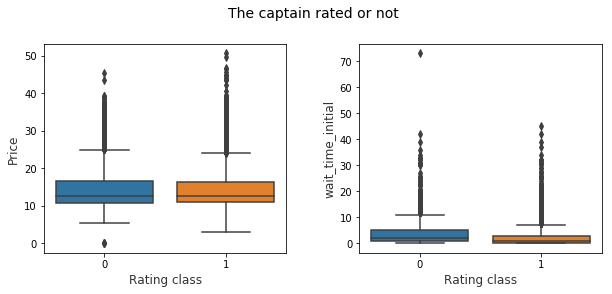

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.suptitle('The captain rated or not', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)
sns.boxplot(x="was_rated", y="price", data=train, ax=ax1)
ax1.set_xlabel("Rating class",size = 12,alpha=0.8)
ax1.set_ylabel("Price",size = 12,alpha=0.8)
sns.boxplot(x="was_rated", y="wait_time_initial", data=train, ax=ax2)
ax2.set_xlabel("Rating class",size = 12,alpha=0.8)
ax2.set_ylabel("wait_time_initial",size = 12,alpha=0.8)

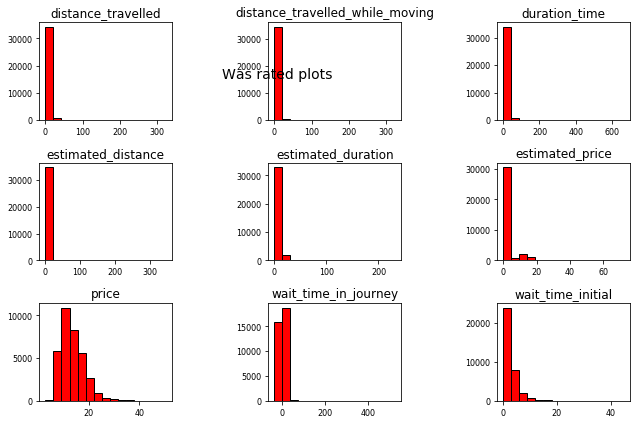

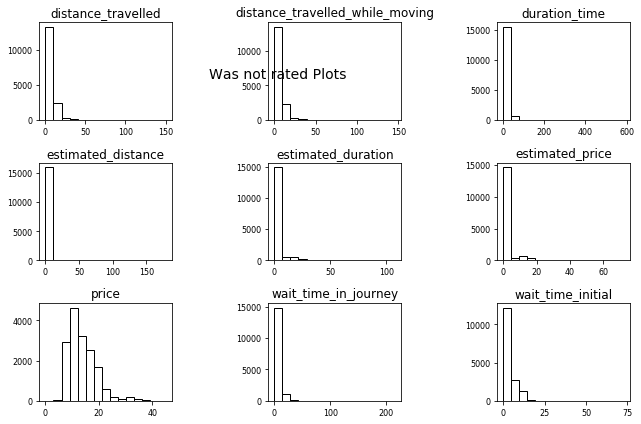

In [30]:
#Univariate Analysis
train[train['was_rated']==1][['estimated_distance','distance_travelled','distance_travelled_while_moving','estimated_duration','duration_time','wait_time_initial','wait_time_in_journey','estimated_price','price']].hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))
rt = plt.suptitle('Was rated plots', x=0.65, y=1.25, fontsize=14)
train[train['was_rated']==0][['estimated_distance','distance_travelled','distance_travelled_while_moving','estimated_duration','duration_time','wait_time_initial','wait_time_in_journey','estimated_price','price']].hist(bins=15, color='white', edgecolor='black', linewidth=1.0,
xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))
wt = plt.suptitle('Was not rated Plots', x=0.65, y=1.25, fontsize=14)

In [31]:
#Our previous hypothetis oubout 'wait_time_initial' can be seen again
#Also the 'distance_travelled_while_moving' seems to be more sparse on the "was not rated case"

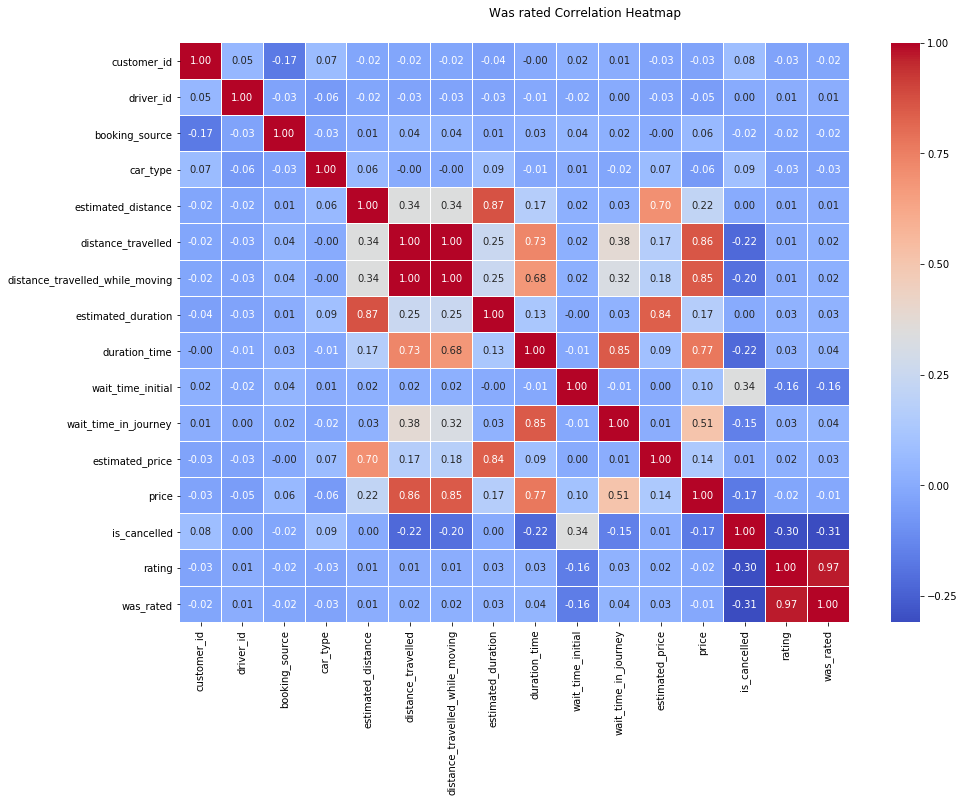

In [32]:
f, ax = plt.subplots(figsize=(15, 10))
corr = train.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Was rated Correlation Heatmap', fontsize=12)

In [45]:
#SOme interesting insight. We could see it previouly too, for instance the waited time initial is a little bit
#negatively correlated with the rating: the increaseness of the waited time initial, decrease the rating not.
#Also the "is_cancelled variable seems to be a little bit negatively correlated with the distance_travelled,duration_time,
#distance_travelled_while_moving, rating, etc

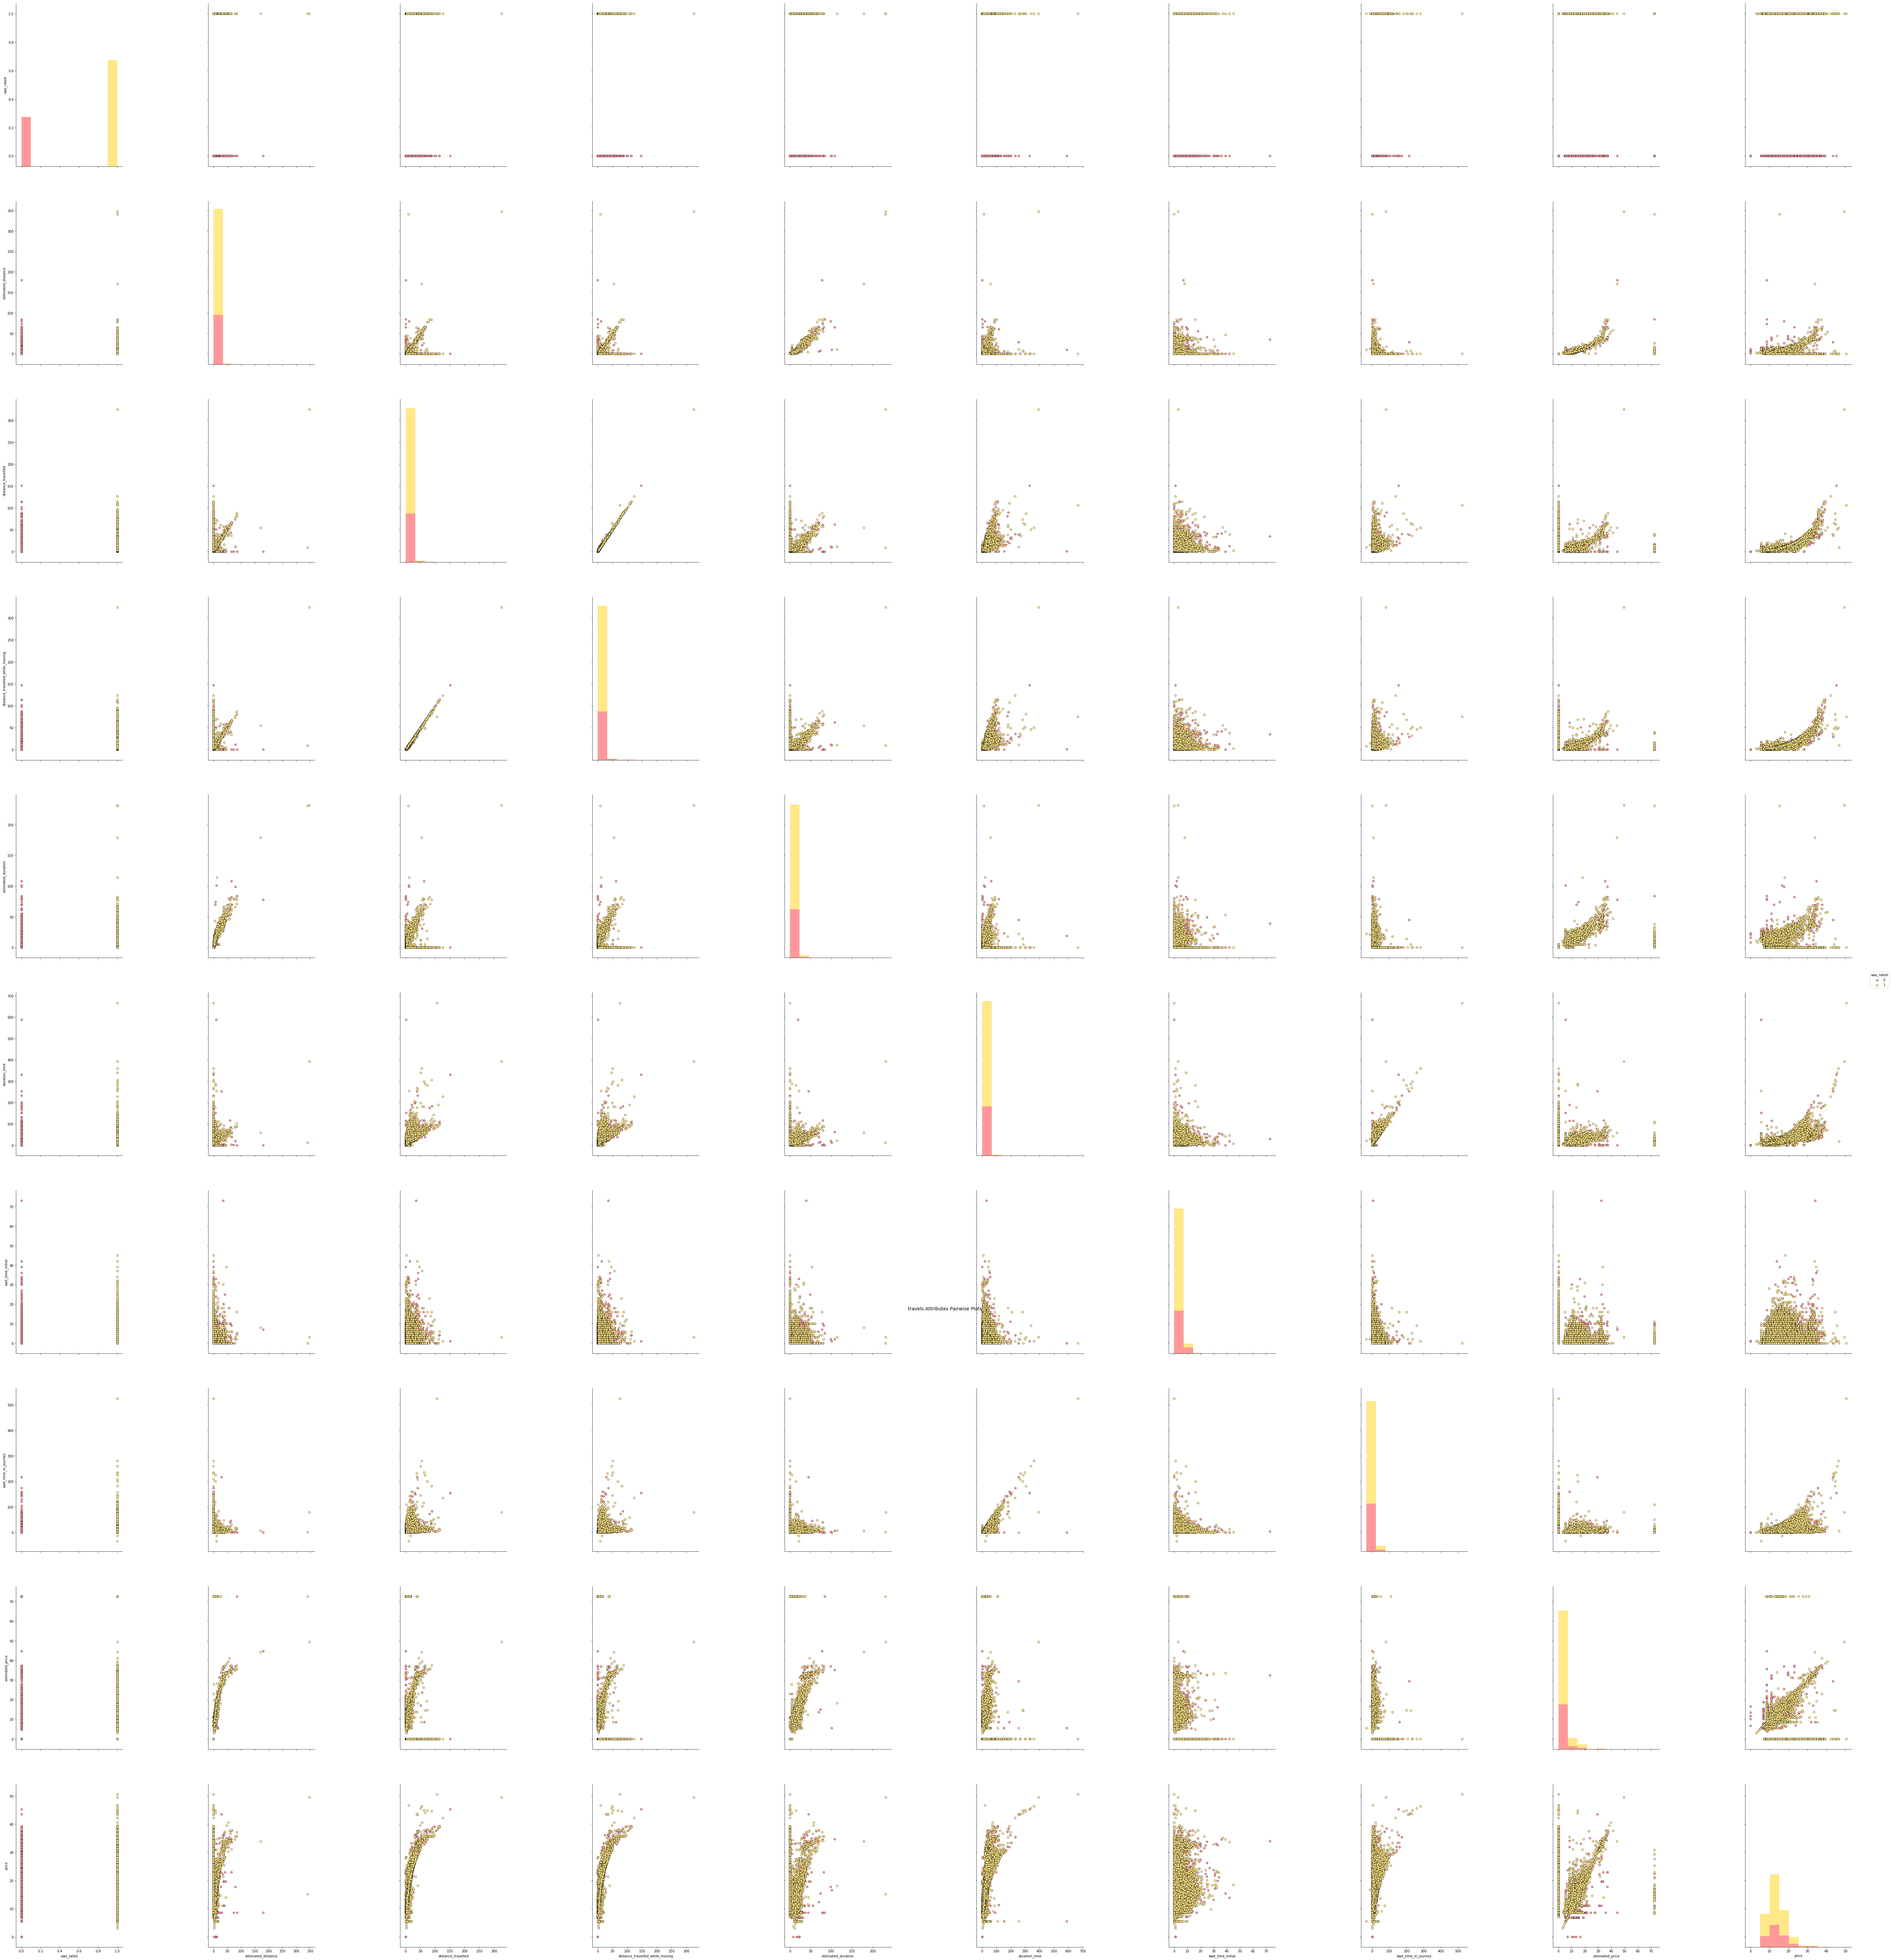

In [55]:
cols = ['was_rated','estimated_distance','distance_travelled','distance_travelled_while_moving','estimated_duration','duration_time','wait_time_initial','wait_time_in_journey','estimated_price','price']
pp = sns.pairplot(train[cols], hue='was_rated', size=2.8, aspect=2.8,
palette={0: "#FF9999", 1: "#FFE888"},
plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig
fig.subplots_adjust(top=2.93, wspace=0.8)
t = fig.suptitle('travels Attributes Pairwise Plots', fontsize=14)

In [43]:
train[train['is_cancelled']==1]['was_rated'].unique()

array([0], dtype=int64)

In [37]:
"""
it is obvious that when a trip is cancelled, the driver is not rated, so we will be foucsing only on data
points where the variable "is_cancelled" is 0
"""

((51083, 15), (17201, 15))

In [84]:
test_0=test[test['is_cancelled']==0]
test_1=test[test['is_cancelled']==1]
train_0=train[train['is_cancelled']==0]
y=train_0['was_rated']
train_1=train[train['is_cancelled']==1]
train_0.shape,test_0.shape, y.shape

((48898, 17), (16452, 15), (48898,))

In [47]:
train_0.tail()

,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,was_rated,rating
51078,25877364,691400,2017-09-18 14:24:35.000,2,2,6.5693,6.87001,5.38361,12,24,5,14,9.103512,9.103512,0,1,5
51079,5714380,1697872,2017-09-18 14:31:18.000,2,1,0.0000,14.76380,13.97750,0,31,0,9,0.000000,20.463886,0,1,5
51080,45903388,1782824,2017-09-18 15:46:06.000,2,1,0.0000,7.84105,7.11211,0,25,0,11,0.000000,16.157845,0,1,1
51081,3597676,1737908,2017-09-18 16:00:12.000,2,1,0.0000,3.81752,3.60602,0,7,0,1,0.000000,9.425753,0,1,5
51082,13132412,1776368,2017-09-18 16:01:58.000,2,1,0.0000,8.99777,8.68939,0,14,1,2,0.000000,15.610675,0,1,5


In [53]:
X=pd.concat([train_0.drop(['is_cancelled','was_rated','rating'], axis=1),test_0.drop(['is_cancelled'], axis=1)])

In [56]:
X.tail()

,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price
17196,31024836,2036832,2017-09-18 12:35:18.000,2,1,4.2139,3.40160,3.29598,12,6,2,0,11.658433,8.535757
17197,48161736,881872,2017-09-18 12:55:16.000,1,1,0.0000,11.05320,9.55201,0,35,2,19,0.000000,19.317201
17198,17625756,1751296,2017-09-18 13:00:58.000,2,1,0.0000,1.88240,1.50797,0,8,1,5,0.000000,8.507064
17199,55804440,1620372,2017-09-18 16:09:20.000,1,1,0.0000,8.46876,7.62169,0,23,2,9,0.000000,15.854118
17200,11865072,2053440,2017-09-18 16:05:55.000,2,1,0.0000,10.01200,9.31891,0,22,4,4,0.000000,16.753681


In [57]:
len(X['driver_id'].unique())

5811

In [58]:
#let us create some interesting features
X['speed']=X['distance_travelled']/X['duration_time']

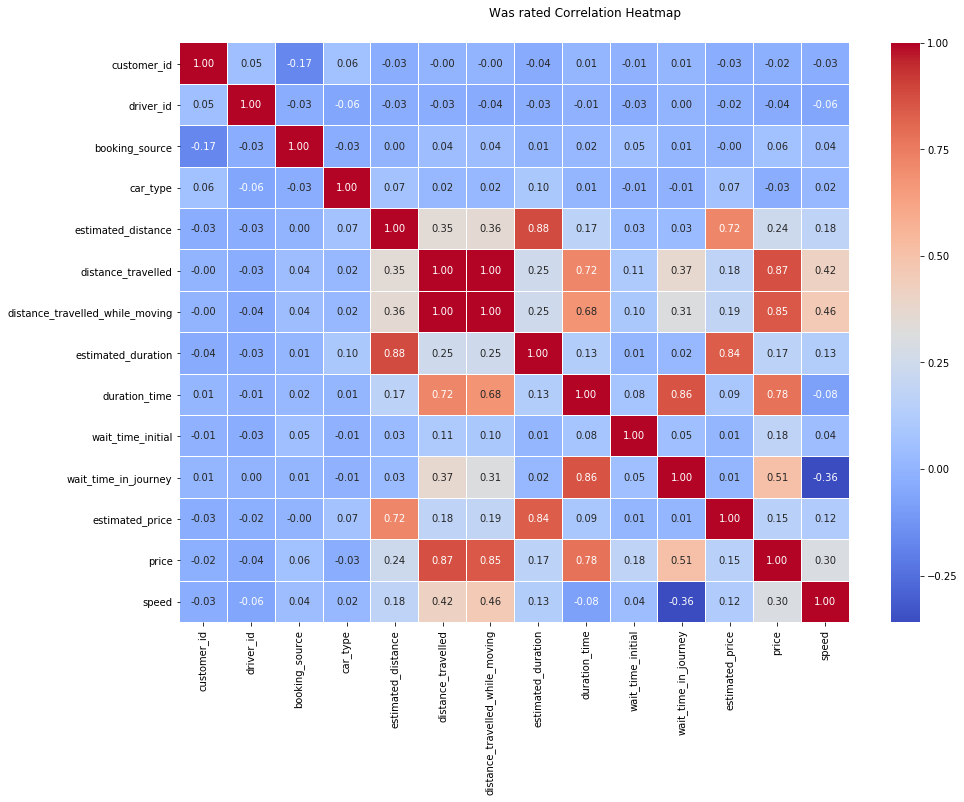

In [59]:
f, ax = plt.subplots(figsize=(15, 10))
corr = X.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Was rated Correlation Heatmap', fontsize=12)

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65350 entries, 0 to 17200
Data columns (total 15 columns):
customer_id                        65350 non-null int64
driver_id                          65350 non-null int64
creation_date                      65350 non-null object
booking_source                     65350 non-null int64
car_type                           65350 non-null int64
estimated_distance                 65350 non-null float64
distance_travelled                 65350 non-null float64
distance_travelled_while_moving    65350 non-null float64
estimated_duration                 65350 non-null int64
duration_time                      65350 non-null int64
wait_time_initial                  65350 non-null int64
wait_time_in_journey               65350 non-null int64
estimated_price                    65350 non-null float64
price                              65350 non-null float64
speed                              65268 non-null float64
dtypes: float64(6), int64(8), object(1

In [61]:
#By looking only for non cancelled, we see more strong correlations

In [68]:
X['Year']=X['creation_date'].str[0:4].astype(int)
X['Month']=X['creation_date'].str[5:7].astype(int)
X['Day']=X['creation_date'].str[8:10].astype(int)
X['Hour_time']=X['creation_date'].str[10:12].astype(int)
X['Hour_time']=X['creation_date'].str[11:13].astype(int)
X['Min_time']=X['creation_date'].str[14:16].astype(int)
X=X.drop(['creation_date'], axis=1)

In [69]:
X.tail()

,customer_id,driver_id,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,speed,Year,Month,Day,Hour_time,Min_time
17196,31024836,2036832,2,1,4.2139,3.40160,3.29598,12,6,2,0,11.658433,8.535757,0.566933,2017,9,18,12,35
17197,48161736,881872,1,1,0.0000,11.05320,9.55201,0,35,2,19,0.000000,19.317201,0.315806,2017,9,18,12,55
17198,17625756,1751296,2,1,0.0000,1.88240,1.50797,0,8,1,5,0.000000,8.507064,0.235300,2017,9,18,13,0
17199,55804440,1620372,1,1,0.0000,8.46876,7.62169,0,23,2,9,0.000000,15.854118,0.368207,2017,9,18,16,9
17200,11865072,2053440,2,1,0.0000,10.01200,9.31891,0,22,4,4,0.000000,16.753681,0.455091,2017,9,18,16,5


In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65350 entries, 0 to 17200
Data columns (total 19 columns):
customer_id                        65350 non-null int64
driver_id                          65350 non-null int64
booking_source                     65350 non-null int64
car_type                           65350 non-null int64
estimated_distance                 65350 non-null float64
distance_travelled                 65350 non-null float64
distance_travelled_while_moving    65350 non-null float64
estimated_duration                 65350 non-null int64
duration_time                      65350 non-null int64
wait_time_initial                  65350 non-null int64
wait_time_in_journey               65350 non-null int64
estimated_price                    65350 non-null float64
price                              65350 non-null float64
speed                              65268 non-null float64
Year                               65350 non-null int32
Month                              6535

In [71]:
#Let us buid a model now, i will be using first models that are built on top of decision tree,
#like Random forest and xgboost, so no need to scale the attributes

In [94]:
X=X.drop(['speed'], axis=1)
train=X[0:48898]
test=X[48898:]
train.shape, test.shape

((48898, 18), (16452, 18))

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train1, X_val1, y_train1, y_val1= train_test_split(train,y)
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train1, y_train1)
y_pred = rnd_clf.predict(X_val1)
a=accuracy_score(y_val1, y_pred)

In [96]:
a

0.64948875255623717

In [93]:
X.isnull().sum()

customer_id                        0
driver_id                          0
booking_source                     0
car_type                           0
estimated_distance                 0
distance_travelled                 0
distance_travelled_while_moving    0
estimated_duration                 0
duration_time                      0
wait_time_initial                  0
wait_time_in_journey               0
estimated_price                    0
price                              0
speed                              0
Year                               0
Month                              0
Day                                0
Hour_time                          0
Min_time                           0
dtype: int64

In [97]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_val1, y_pred)
confusion_mat

array([[ 747, 2799],
       [1486, 7193]], dtype=int64)

In [104]:
display_model_performance_metrics(true_labels=y_val1, predicted_labels=y_pred, 
                                      classes=[0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.6495
Precision: 0.6081
Recall: 0.6495
F1 Score: 0.622

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.33      0.21      0.26      3546
          1       0.72      0.83      0.77      8679

avg / total       0.61      0.65      0.62     12225


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0        747  2799
        1       1486  7193


In [100]:
"""@author: DIP

@Copyright: Dipanjan Sarkar
Thanks to Dipanjan
"""



from sklearn import metrics

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.base import clone

from sklearn.preprocessing import label_binarize

from scipy import interp

from sklearn.metrics import roc_curve, auc 





def get_metrics(true_labels, predicted_labels):

    

    print('Accuracy:', np.round(

                        metrics.accuracy_score(true_labels, 

                                               predicted_labels),

                        4))

    print('Precision:', np.round(

                        metrics.precision_score(true_labels, 

                                               predicted_labels,

                                               average='weighted'),

                        4))

    print('Recall:', np.round(

                        metrics.recall_score(true_labels, 

                                               predicted_labels,

                                               average='weighted'),

                        4))

    print('F1 Score:', np.round(

                        metrics.f1_score(true_labels, 

                                               predicted_labels,

                                               average='weighted'),

                        4))

                        



def train_predict_model(classifier, 

                        train_features, train_labels, 

                        test_features, test_labels):

    # build model    

    classifier.fit(train_features, train_labels)

    # predict using model

    predictions = classifier.predict(test_features) 

    return predictions    





def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):

    

    total_classes = len(classes)

    level_labels = [total_classes*[0], list(range(total_classes))]



    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 

                                  labels=classes)

    cm_frame = pd.DataFrame(data=cm, 

                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 

                                                  labels=level_labels), 

                            index=pd.MultiIndex(levels=[['Actual:'], classes], 

                                                labels=level_labels)) 

    print(cm_frame) 

    

def display_classification_report(true_labels, predicted_labels, classes=[1,0]):



    report = metrics.classification_report(y_true=true_labels, 

                                           y_pred=predicted_labels, 

                                           labels=classes) 

    print(report)

    

    

    

def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):

    print('Model Performance metrics:')

    print('-'*30)

    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)

    print('\nModel Classification report:')

    print('-'*30)

    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 

                                  classes=classes)

    print('\nPrediction Confusion Matrix:')

    print('-'*30)

    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 

                             classes=classes)





def plot_model_decision_surface(clf, train_features, train_labels,

                                plot_step=0.02, cmap=plt.cm.RdYlBu,

                                markers=None, alphas=None, colors=None):

    

    if train_features.shape[1] != 2:

        raise ValueError("X_train should have exactly 2 columnns!")

    

    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step

    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),

                         np.arange(y_min, y_max, plot_step))



    clf_est = clone(clf)

    clf_est.fit(train_features,train_labels)

    if hasattr(clf_est, 'predict_proba'):

        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]

    else:

        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    

    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=cmap)

    

    le = LabelEncoder()

    y_enc = le.fit_transform(train_labels)

    n_classes = len(le.classes_)

    plot_colors = ''.join(colors) if colors else [None] * n_classes

    label_names = le.classes_

    markers = markers if markers else [None] * n_classes

    alphas = alphas if alphas else [None] * n_classes

    for i, color in zip(range(n_classes), plot_colors):

        idx = np.where(y_enc == i)

        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,

                    label=label_names[i], cmap=cmap, edgecolors='black', 

                    marker=markers[i], alpha=alphas[i])

    plt.legend()

    plt.show()





def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):

    

    ## Compute ROC curve and ROC area for each class

    fpr = dict()

    tpr = dict()

    roc_auc = dict()

    if hasattr(clf, 'classes_'):

        class_labels = clf.classes_

    elif label_encoder:

        class_labels = label_encoder.classes_

    elif class_names:

        class_labels = class_names

    else:

        raise ValueError('Unable to derive prediction classes, please specify class_names!')

    n_classes = len(class_labels)

    y_test = label_binarize(true_labels, classes=class_labels)

    if n_classes == 2:

        if hasattr(clf, 'predict_proba'):

            prob = clf.predict_proba(features)

            y_score = prob[:, prob.shape[1]-1] 

        elif hasattr(clf, 'decision_function'):

            prob = clf.decision_function(features)

            y_score = prob[:, prob.shape[1]-1]

        else:

            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        

        fpr, tpr, _ = roc_curve(y_test, y_score)      

        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'

                                 ''.format(roc_auc),

                 linewidth=2.5)

        

    elif n_classes > 2:

        if hasattr(clf, 'predict_proba'):

            y_score = clf.predict_proba(features)

        elif hasattr(clf, 'decision_function'):

            y_score = clf.decision_function(features)

        else:

            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")



        for i in range(n_classes):

            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])

            roc_auc[i] = auc(fpr[i], tpr[i])



        ## Compute micro-average ROC curve and ROC area

        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())

        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])



        ## Compute macro-average ROC curve and ROC area

        # First aggregate all false positive rates

        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points

        mean_tpr = np.zeros_like(all_fpr)

        for i in range(n_classes):

            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC

        mean_tpr /= n_classes

        fpr["macro"] = all_fpr

        tpr["macro"] = mean_tpr

        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])



        ## Plot ROC curves

        plt.figure(figsize=(6, 4))

        plt.plot(fpr["micro"], tpr["micro"],

                 label='micro-average ROC curve (area = {0:0.2f})'

                       ''.format(roc_auc["micro"]), linewidth=3)



        plt.plot(fpr["macro"], tpr["macro"],

                 label='macro-average ROC curve (area = {0:0.2f})'

                       ''.format(roc_auc["macro"]), linewidth=3)



        for i, label in enumerate(class_labels):

            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'

                                           ''.format(label, roc_auc[i]), 

                     linewidth=2, linestyle=':')

    else:

        raise ValueError('Number of classes should be atleast 2 or more')

        

    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([0.0, 1.0])

    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title('Receiver Operating Characteristic (ROC) Curve')

    plt.legend(loc="lower right")

    plt.show()

In [107]:
#The model is not permforming good at all, let us try to introduce some parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
                'n_estimators': [100, 200, 300, 500], 
                'max_features': ['auto', None, 'log2']    
              }

wqp_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5,
                       scoring='accuracy')
wqp_clf.fit(X_train1, y_train1)
print(wqp_clf.best_params_)

{'max_features': 'auto', 'n_estimators': 500}


In [108]:
results = wqp_clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'max_features': 'auto', 'n_estimators': 100} 0.7082 0.0017
{'max_features': 'auto', 'n_estimators': 200} 0.7103 0.001
{'max_features': 'auto', 'n_estimators': 300} 0.711 0.0009
{'max_features': 'auto', 'n_estimators': 500} 0.7116 0.0015
{'max_features': None, 'n_estimators': 100} 0.7048 0.0012
{'max_features': None, 'n_estimators': 200} 0.7069 0.0007
{'max_features': None, 'n_estimators': 300} 0.708 0.0011
{'max_features': None, 'n_estimators': 500} 0.7088 0.0014
{'max_features': 'log2', 'n_estimators': 100} 0.7082 0.0017
{'max_features': 'log2', 'n_estimators': 200} 0.7103 0.001
{'max_features': 'log2', 'n_estimators': 300} 0.711 0.0009
{'max_features': 'log2', 'n_estimators': 500} 0.7116 0.0015


In [109]:
wqp_rf = RandomForestClassifier(n_estimators=500, max_features='auto', random_state=42)
wqp_rf.fit(X_train1, y_train1)

y_pred = wqp_rf.predict(X_val1)
display_model_performance_metrics(true_labels=y_val1, predicted_labels=y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.7091
Precision: 0.6418
Recall: 0.7091
F1 Score: 0.6001

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.47      0.02      0.04      3546
          1       0.71      0.99      0.83      8679

avg / total       0.64      0.71      0.60     12225


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0         76  3470
        1         86  8593


In [110]:
#The model detects the class 1 (was_rating) with a very high recall, but is very worst on the class 0 (was_not_rating).
#More precisely, the model detect 99% of the "was_rating", butand when it says that such driver was_rating, this is true 71% of the time. 
#On the other hand, it detects only 2% of the was_not_rating, and when it says that this driver was  not rating, this is 
#true only 47% of the time.
#So we need to propose better, i know that we are dealing with a binary classification model, and i should first check
#a logistic regression, we well do it shortly, but first of all, let us transform our driver_id variable, it is wrong
#interpret it as a numerical variable, it is a nominal categorical varibale, but with more than 5000 unique values,
#so whe shoul use a onehotencoding, but this may be very consomming in memory with more thant 5000 added binary attributes
#So we need another transformer to handle this.


In [132]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=20, input_type='string')
X['driver_id']=X['driver_id'].astype(str)
hashed_features1 = fh.fit_transform(X['driver_id'])
hashed_features1 = hashed_features1.toarray()
X['customer_id']=X['customer_id'].astype(str)
hashed_features2 = fh.fit_transform(X['customer_id'])
hashed_features2 = hashed_features.toarray()

In [133]:
# pd.DataFrame(hashed_features, columns=['driver_id' + str(i) for i in range(20)])
X_tr=X.drop(['driver_id'], axis=1).join(pd.DataFrame(hashed_features1, columns=['driver_id' + str(i) for i in range(20)]))
X_tr=X_tr.drop(['customer_id'], axis=1).join(pd.DataFrame(hashed_features2, columns=['customer_id' + str(i) for i in range(20)]))

In [134]:
X_tr.head()

,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,...,customer_id10,customer_id11,customer_id12,customer_id13,customer_id14,customer_id15,customer_id16,customer_id17,customer_id18,customer_id19
0,1,1,0.0,7.28666,7.17712,0,11,18,2,0.0,...,0.0,0.0,-1.0,-2.0,0.0,0.0,0.0,-1.0,0.0,0.0
0,1,1,0.0,14.58090,13.63340,0,35,0,14,0.0,...,0.0,0.0,-1.0,-2.0,0.0,0.0,0.0,-1.0,0.0,0.0
1,1,1,0.0,1.25836,1.05664,0,4,1,1,0.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
1,2,1,0.0,3.11665,2.78458,0,9,1,3,0.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
2,2,1,0.0,14.57820,14.44060,0,16,3,2,0.0,...,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,-1.0,0.0,0.0


In [128]:
len(X['customer_id'].unique()), len(X)

(11337, 65350)

In [135]:
train=X_tr[0:48898]
test=X_tr[48898:]

In [136]:
X_train1, X_val1, y_train1, y_val1= train_test_split(train,y)
wqp_rf = RandomForestClassifier(n_estimators=500, max_features='auto', random_state=42)
wqp_rf.fit(X_train1, y_train1)

y_pred = wqp_rf.predict(X_val1)
display_model_performance_metrics(true_labels=y_val1, predicted_labels=y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.7061
Precision: 0.6057
Recall: 0.7061
F1 Score: 0.5853

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.36      0.00      0.00      3590
          1       0.71      1.00      0.83      8635

avg / total       0.61      0.71      0.59     12225


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0          4  3586
        1          7  8628


In [137]:
#The model got a little bit worster, it improves the precision and recall of the class 1
#but did worst on the class 0 (was_not_rated)

In [139]:
#Let us try a logistic regression now
from sklearn.linear_model import LogisticRegression

wtp_lr = LogisticRegression()
wtp_lr.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
y_pred = wtp_lr.predict(X_val1)
display_model_performance_metrics(true_labels=y_val1, predicted_labels=y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.7063
Precision: 0.4989
Recall: 0.7063
F1 Score: 0.5848

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      3590
          1       0.71      1.00      0.83      8635

avg / total       0.50      0.71      0.58     12225


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0          0  3590
        1          0  8635


c:\users\ds8\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ds8\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ds8\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [141]:
#Almos the same results as the preceding, but worst in the 0 class

In [144]:
#Without the feature hashing
X_train1, X_val1, y_train1, y_val1= train_test_split(X[0:48898],y)
wtp_lr = LogisticRegression()
wtp_lr.fit(X_train1, y_train1)
y_pred = wtp_lr.predict(X_val1)
display_model_performance_metrics(true_labels=y_val1, predicted_labels=y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.7118
Precision: 0.5067
Recall: 0.7118
F1 Score: 0.592

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      3523
          1       0.71      1.00      0.83      8702

avg / total       0.51      0.71      0.59     12225


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0          0  3523
        1          0  8702


c:\users\ds8\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ds8\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ds8\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [158]:
#Not much difference, it can be seen that the features hashing coding with only 20 colums loose some much informations,
#but here the logistic regression model does not detect was_not_rated class at all
#Let us modify a little bit the fature hashing, becafure, this can be very consuming on memory
fh = FeatureHasher(n_features=50, input_type='string')
X['driver_id']=X['driver_id'].astype(str)
hashed_features1 = fh.fit_transform(X['driver_id'])
hashed_features1 = hashed_features1.toarray()
X['customer_id']=X['customer_id'].astype(str)
hashed_features2 = fh.fit_transform(X['customer_id'])
hashed_features2 = hashed_features2.toarray()

In [159]:
X_tr=X.drop(['driver_id'], axis=1).join(pd.DataFrame(hashed_features1, columns=['driver_id' + str(i) for i in range(50)]))

In [160]:
X_tr=X_tr.drop(['customer_id'], axis=1).join(pd.DataFrame(hashed_features2, columns=['customer_id' + str(i) for i in range(50)]))

In [161]:
X_train1, X_val1, y_train1, y_val1= train_test_split(X_tr[0:48898],y)
wtp_lr = LogisticRegression()
wtp_lr.fit(X_train1, y_train1)
y_pred = wtp_lr.predict(X_val1)
display_model_performance_metrics(true_labels=y_val1, predicted_labels=y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.7117
Precision: 0.5066
Recall: 0.7117
F1 Score: 0.5919

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      3524
          1       0.71      1.00      0.83      8701

avg / total       0.51      0.71      0.59     12225


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0          0  3524
        1          0  8701


c:\users\ds8\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ds8\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ds8\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [164]:
#Let us scale the data, i forgot to do it before the logistic regression method, it is a must
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# Define the scaler 
wtp_ss = StandardScaler().fit(X_tr)

# Scale the data set
wtp_train_SX = wtp_ss.transform(X_tr)
X_train1, X_val1, y_train1, y_val1= train_test_split(wtp_train_SX[0:48898],y)
wtp_lr = LogisticRegression()
wtp_lr.fit(X_train1, y_train1)
y_pred = wtp_lr.predict(X_val1)
display_model_performance_metrics(true_labels=y_val1, predicted_labels=y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.7135
Precision: 0.7956
Recall: 0.7135
F1 Score: 0.5942

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       1.00      0.00      0.00      3504
          1       0.71      1.00      0.83      8721

avg / total       0.80      0.71      0.59     12225


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0          1  3503
        1          0  8721


In [171]:
#let us build a neural network to see if it performs better
from keras.models import Sequential
from keras.layers import Dense

wtp_dnn_model = Sequential()
wtp_dnn_model.add(Dense(16, activation='relu', input_shape=(18,)))
wtp_dnn_model.add(Dense(16, activation='relu'))
wtp_dnn_model.add(Dense(16, activation='relu'))
wtp_dnn_model.add(Dense(1, activation='sigmoid'))

wtp_dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [172]:
wtp_ss = StandardScaler().fit(X)

# Scale the data set
wtp_train_SX = wtp_ss.transform(X)
X_train1, X_val1, y_train1, y_val1= train_test_split(wtp_train_SX[0:48898],y)

In [174]:
D = wtp_dnn_model.fit(X_train1, y_train1, epochs=100, batch_size=50, shuffle=True, validation_split=0.1, verbose=1)

Train on 33005 samples, validate on 3668 samples
Epoch 1/100
33005/33005 [==============================] - 1s 20us/step - loss: 0.5873 - acc: 0.7147 - val_loss: 0.5928 - val_acc: 0.7151
Epoch 2/100
33005/33005 [==============================] - 1s 21us/step - loss: 0.5865 - acc: 0.7146 - val_loss: 0.5929 - val_acc: 0.7148
Epoch 3/100
33005/33005 [==============================] - 1s 18us/step - loss: 0.5862 - acc: 0.7147 - val_loss: 0.5930 - val_acc: 0.7162
Epoch 4/100
33005/33005 [==============================] - 1s 18us/step - loss: 0.5859 - acc: 0.7147 - val_loss: 0.5932 - val_acc: 0.7151
Epoch 5/100
33005/33005 [==============================] - 1s 19us/step - loss: 0.5856 - acc: 0.7152 - val_loss: 0.5943 - val_acc: 0.7156
Epoch 6/100
33005/33005 [==============================] - 1s 19us/step - loss: 0.5853 - acc: 0.7151 - val_loss: 0.5942 - val_acc: 0.7151
Epoch 7/100
33005/33005 [==============================] - 1s 18us/step - loss: 0.5850 - acc: 0.7150 - val_loss: 0.5942 - v

In [175]:
y_pred= wtp_dnn_model.predict_classes(X_val1)
display_model_performance_metrics(true_labels=y_val1, predicted_labels=y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.702
Precision: 0.6049
Recall: 0.702
F1 Score: 0.6013

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.34      0.03      0.06      3541
          1       0.71      0.98      0.82      8684

avg / total       0.60      0.70      0.60     12225


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0        111  3430
        1        213  8471


In [176]:
#A little bit improvement on the 1 class, but with a negative affect on the 0 class

In [178]:
# A decision tree classifier
from sklearn.tree import DecisionTreeClassifier
X_train1, X_val1, y_train1, y_val1= train_test_split(X[0:48898],y)
wqp_dt = DecisionTreeClassifier()
wqp_dt.fit(X_train1, y_train1)

y_pred = wqp_dt.predict(X_val1)

display_model_performance_metrics(true_labels=y_val1, predicted_labels=y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.5879
Precision: 0.5957
Recall: 0.5879
F1 Score: 0.5916

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.29      0.31      0.30      3493
          1       0.72      0.70      0.71      8732

avg / total       0.60      0.59      0.59     12225


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       1087  2406
        1       2632  6100


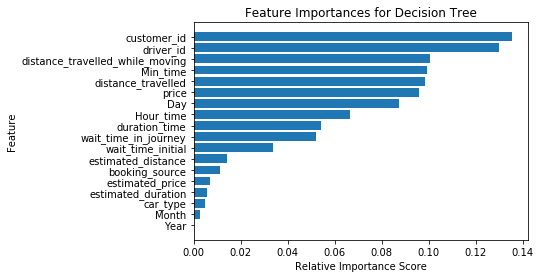

In [180]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(list(X_train1.columns), wqp_dt_feature_importances), 
                                                          key=lambda x: x[1]))
y_position = list(range(len(list(X_train1.columns))))
plt.barh(y_position, wqp_dt_feature_scores, height=0.8, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

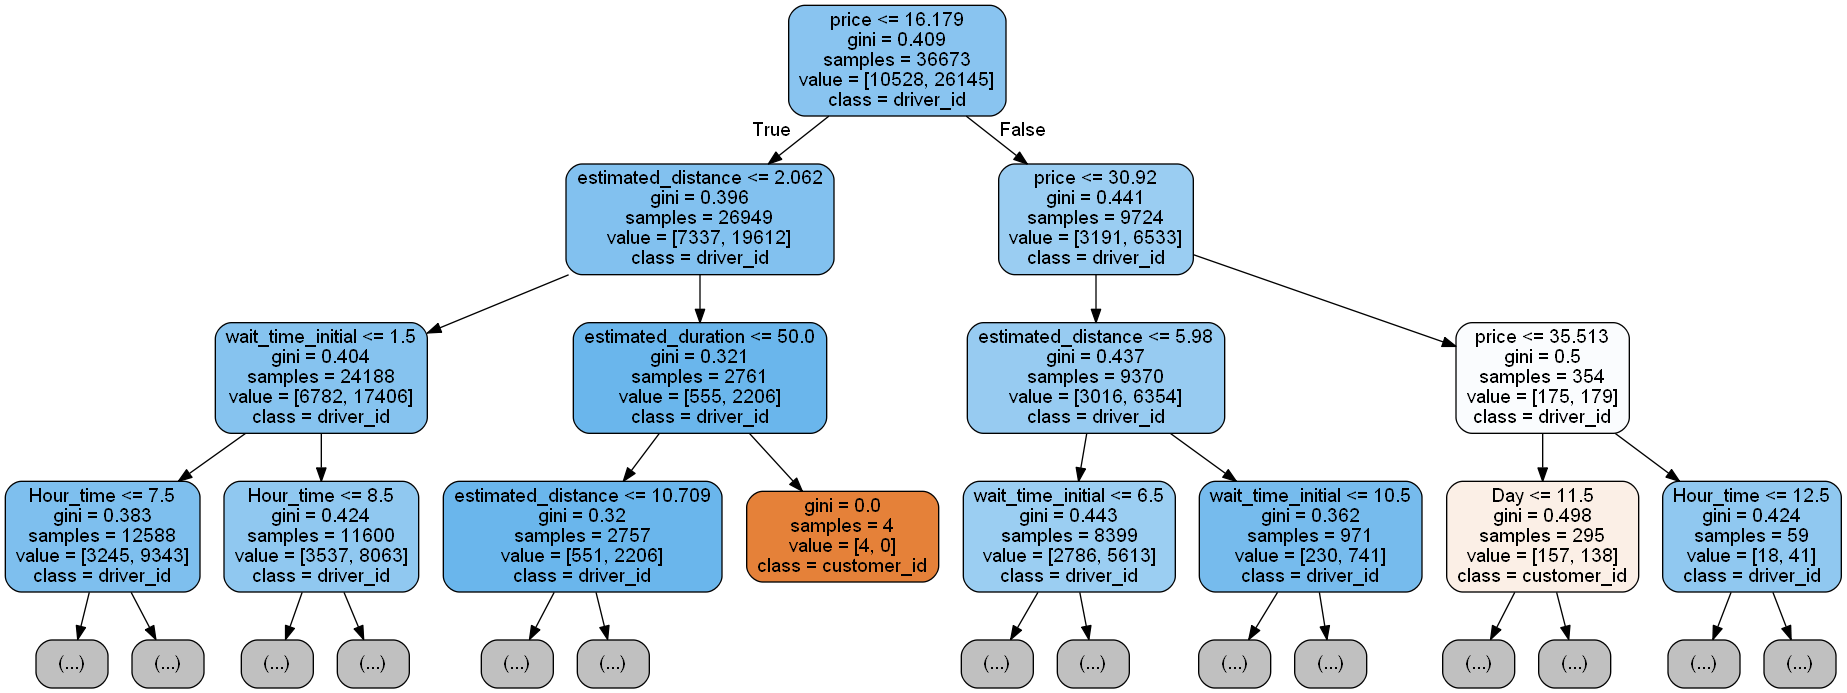

In [181]:
from graphviz import Source
from sklearn import tree
from IPython.display import Image

graph = Source(tree.export_graphviz(wqp_dt, out_file=None, class_names=list(X_train1.columns),
                                    filled=True, rounded=True, special_characters=False,
                                    feature_names=list(X_train1.columns), max_depth=3))
png_data = graph.pipe(format='png')
with open('dtree_structure.png','wb') as f:
    f.write(png_data)

Image(png_data)

In [183]:
#Let us use xgboot model
X['driver_id']=X['driver_id'].astype(int)
X['customer_id']=X['customer_id'].astype(int)
X_train1, X_val1, y_train1, y_val1= train_test_split(X[0:48898],y)
wqp_xgb_model = xgb.XGBClassifier(seed=42)
wqp_xgb_model.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)

In [184]:
y_pred = wqp_xgb_model.predict(X_val1)

display_model_performance_metrics(true_labels=y_val1, predicted_labels=y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.7135
Precision: 0.6657
Recall: 0.7135
F1 Score: 0.5975

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.55      0.01      0.01      3507
          1       0.71      1.00      0.83      8718

avg / total       0.67      0.71      0.60     12225


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0         24  3483
        1         20  8698


In [186]:
param_grid = {
                'n_estimators': [100, 200, 300], 
                'max_depth': [5, 7, 10, 15],
                'learning_rate': [0.3, 0.5]
              }

wqp_clf = GridSearchCV(xgb.XGBClassifier(seed=42), param_grid, 
                       cv=5, scoring='accuracy')
wqp_clf.fit(X_train1, y_train1)
print(wqp_clf.best_params_)

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}


In [187]:
wqp_xgb_model = xgb.XGBClassifier(seed=42, max_depth=5, learning_rate=0.3, n_estimators=100)
wqp_xgb_model.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)

In [188]:
y_pred =wqp_xgb_model.predict(X_val1)

display_model_performance_metrics(true_labels=y_val1, predicted_labels=y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.7092
Precision: 0.6355
Recall: 0.7092
F1 Score: 0.6126

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.43      0.04      0.08      3507
          1       0.72      0.98      0.83      8718

avg / total       0.64      0.71      0.61     12225


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0        152  3355
        1        200  8518


In [198]:
#I would go with the xgboos model, aggrgating this different model can also brign a good precision and recal.
#But before let us fix some issues about the variable 'distance_travelled', there som many datapoints where the price is not 
#nul, the duration is not null, the journey was not cancelled, but the 'distance_travelled' is null, that is not possible, you can a have a long duration with a
#enough important price and say that the 'distance_travelled' is zero, this is an issue that has to be fixed, and
#we can see it it the graph below, because normaly, 'distance_travelled' has to be strongly correlated with price and
#duration time, and we will see that this is the case, excepted for the case where the 'distance_travelled' is zeros

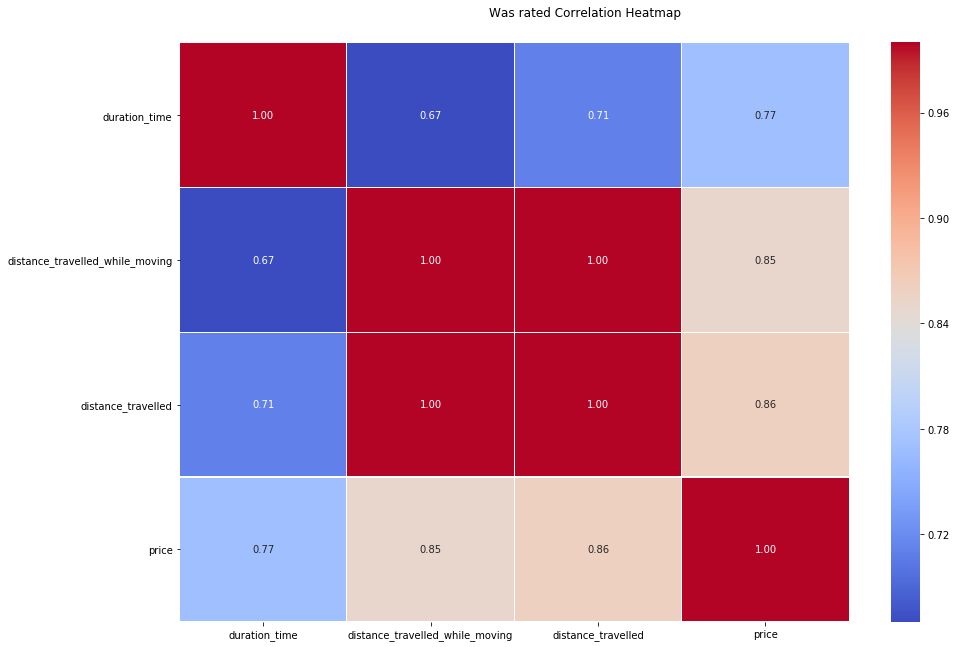

In [199]:
f, ax = plt.subplots(figsize=(15, 10))
corr = X[0:48898][X[0:48898]['distance_travelled']>0][['duration_time','distance_travelled_while_moving','distance_travelled','price']].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Was rated Correlation Heatmap', fontsize=12)

In [1]:
#So to finisih, i would choose the xgboost model to make prevision, after correcting some issues. Recall that we have filter
#our dataset and work only with datapoint where the was_cancelled" variable is 0, for the case where it is 1, we saw that this
#was obviously a non rated class. 
#With more times, i would have built some interesting attributes like "day of week", "holiday days" and so one,
#But unfortunatelly, i am very busy these days with lot of work with my company

In [2]:
2

2

0

(11, 18)

In [4]:
#So to finisih, i would choose the xgboost model to make prevision, after correcting some issues. Recall that we have filter
#our dataset and work only with datapoint where the was_cancelled" variable is 0, for the case where it is 1, we saw that this
#was obviously a non rated class. 
#With more times, i would have built some interesting attributes like "day of week", "holiday days" and so one,
#But unfortunatelly, i am very busy these days with lot of work with my company